In [1]:
import pandas as pd
import numpy as np
train_r

In [74]:
train_region = "SanDiego"
test_region = "Austin"
appliance = "hvac"
feature = "Monthly"
strategy_list = ["None","CDD","median-aggregate"][:]
import glob

In [87]:
out = {}
for strategy in strategy_list:
    directory = '../data/output/cross/%s_%s_%s_%s_%s/' % (train_region, 
                                                            test_region,
                                                             strategy,
                                                            appliance,
                                                            
                                                           feature)
    home_files = glob.glob(directory+"*.csv")
    out[strategy] = {}
    homes = []
    for home_file in home_files:
        home = int(home_file.split("/")[-1][:-4])
        homes.append(home)
        df = pd.read_csv(home_file, index_col=0, header=None).squeeze()
        df.index.name = "Month"
        out[strategy][home]=df

In [88]:
acc={strategy:pd.DataFrame(out[strategy]).mean(axis=1) for strategy in strategy_list}




In [89]:
%matplotlib inline

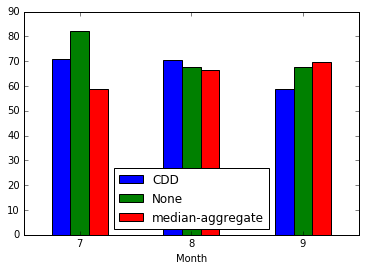

In [90]:
pd.DataFrame(acc).plot(kind="bar",rot=0)

In [91]:
acc

{'CDD': Month
 7    71.054210
 8    70.592257
 9    58.666374
 dtype: float64, 'None': Month
 7    82.005931
 8    67.586248
 9    67.772089
 dtype: float64, 'median-aggregate': Month
 7    58.593951
 8    66.618140
 9    69.847450
 dtype: float64}